# Project 4
______

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import missingno as msno


### Covid surveillance data

In [38]:
#setting options to be able to see whole text in dataframe columns
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('max_colwidth',800)

In [49]:
# url='https://drive.google.com/file/d/1muBh32vAqHnyTnir-kW0bvnVTqd2k6ZC/view?usp=sharing'
# dnld_link='https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
# print(dnld_link)

https://drive.google.com/uc?export=download&id=1muBh32vAqHnyTnir-kW0bvnVTqd2k6ZC


In [50]:
# df_surv=pd.read_csv(dnld_link)

In [66]:
df_surv=pd.read_csv('../data/covid_surveillance.csv')

In [67]:
df_surv.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,case_onset_interval,underlying_conditions_yn
0,2022-05,KY,21,JEFFERSON,21111.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,Missing,Missing,Probable Case,Missing,No,Missing,No,NaN,NaN
1,2022-01,WI,55,RACINE,55101.0,50 to 64 years,Male,White,Non-Hispanic/Latino,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Unknown,Missing,Unknown,NaN,NaN
2,2022-01,LA,22,CADDO,22017.0,18 to 49 years,Female,Unknown,Unknown,0.0,Missing,Missing,Laboratory-confirmed case,Unknown,Unknown,Unknown,Missing,NaN,NaN
3,2021-04,FL,12,LEE,12071.0,18 to 49 years,Female,NaN,NaN,-10.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,0.0,NaN
4,2021-08,NC,37,NEW HANOVER,37129.0,0 - 17 years,Female,White,Hispanic/Latino,0.0,Missing,Unknown,Probable Case,Symptomatic,No,Unknown,No,0.0,NaN


In [68]:
df_surv.shape

(500000, 19)

In [106]:
df_surv.head()

,res_state,age_group,sex,race,ethnicity,current_status,symptom_status,hosp_yn,icu_yn,death_yn
case_month,,,,,,,,,,
2020-03-01,PA,18 to 49 years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,Symptomatic,Unknown,Unknown,Unknown
2020-03-01,LA,65+ years,Male,Black,Non-Hispanic/Latino,Laboratory-confirmed case,Unknown,Unknown,Unknown,Missing
2020-03-01,NJ,18 to 49 years,Female,Black,Non-Hispanic/Latino,Laboratory-confirmed case,Symptomatic,Missing,Missing,No
2020-03-01,PA,18 to 49 years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,Symptomatic,No,No,No
2020-03-01,MI,18 to 49 years,Female,White,Non-Hispanic/Latino,Probable Case,Symptomatic,No,Missing,No


In [69]:
df_surv.isnull().sum()

case_month                       0
res_state                        0
state_fips_code                  0
res_county                     871
county_fips_code               871
age_group                     3024
sex                           7959
race                         64748
ethnicity                    75698
case_positive_specimen      270451
process                          0
exposure_yn                      0
current_status                   0
symptom_status                   0
hosp_yn                          0
icu_yn                           0
death_yn                     18368
case_onset_interval         291941
underlying_conditions_yn    483518
dtype: int64

In [72]:
# Dropping state_fips_code, county_fips_code, case_positive_specimen
df_surv.drop(columns=['state_fips_code', 'county_fips_code', 'case_positive_specimen'], inplace=True)

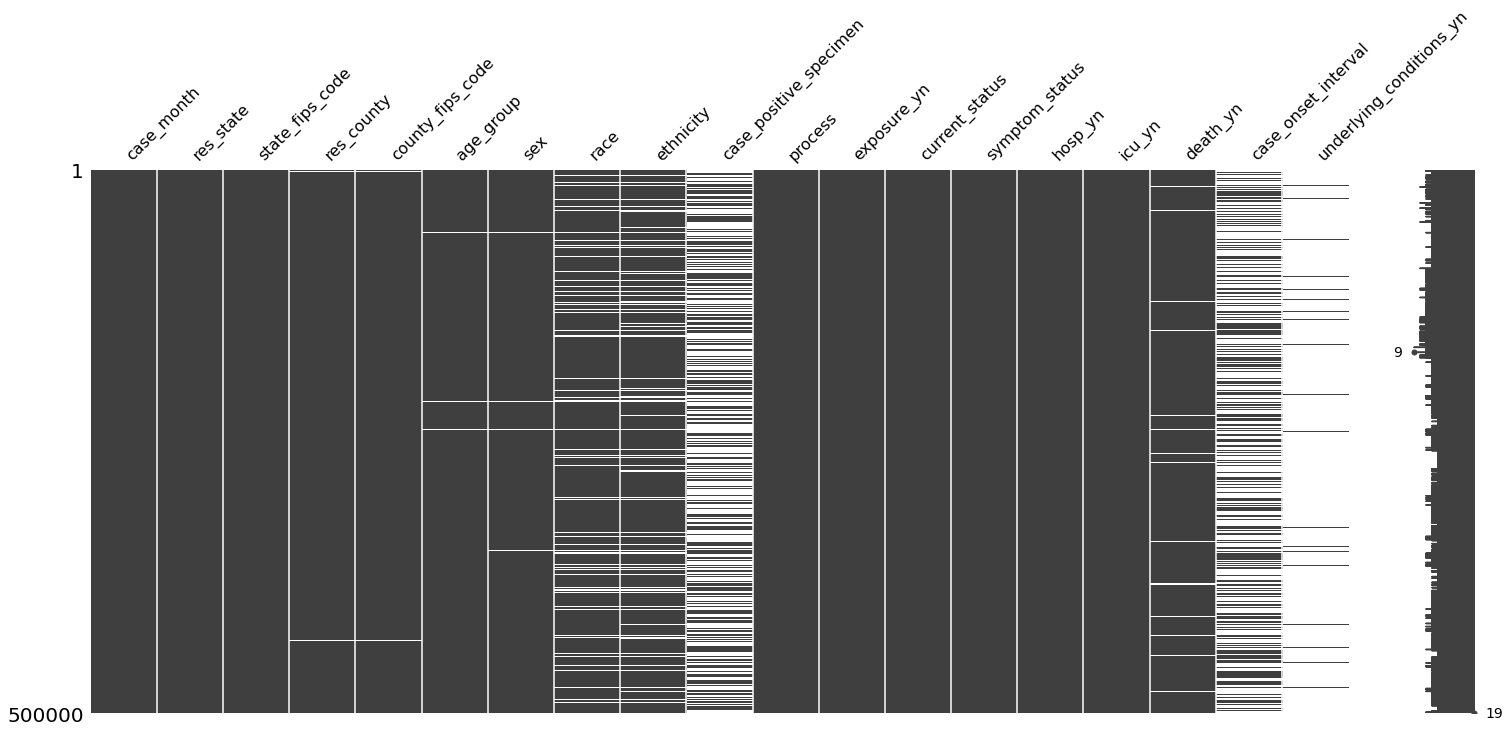

In [70]:
msno.matrix(df_surv);

In [32]:
df_surv.isnull().sum();

In [71]:
#no. of states in the dataset
len(df_surv['res_state'].unique())

49

In [73]:
df_surv.head()

,case_month,res_state,res_county,age_group,sex,race,ethnicity,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,case_onset_interval,underlying_conditions_yn
0,2022-05,KY,JEFFERSON,65+ years,Female,White,Non-Hispanic/Latino,Missing,Missing,Probable Case,Missing,No,Missing,No,NaN,NaN
1,2022-01,WI,RACINE,50 to 64 years,Male,White,Non-Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Missing,Unknown,Missing,Unknown,NaN,NaN
2,2022-01,LA,CADDO,18 to 49 years,Female,Unknown,Unknown,Missing,Missing,Laboratory-confirmed case,Unknown,Unknown,Unknown,Missing,NaN,NaN
3,2021-04,FL,LEE,18 to 49 years,Female,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,0.0,NaN
4,2021-08,NC,NEW HANOVER,0 - 17 years,Female,White,Hispanic/Latino,Missing,Unknown,Probable Case,Symptomatic,No,Unknown,No,0.0,NaN


In [74]:
df_surv.tail();

The surveillance data is from January 2020 to September 2022

In [75]:
df_surv.dtypes

case_month                   object
res_state                    object
res_county                   object
age_group                    object
sex                          object
race                         object
ethnicity                    object
process                      object
exposure_yn                  object
current_status               object
symptom_status               object
hosp_yn                      object
icu_yn                       object
death_yn                     object
case_onset_interval         float64
underlying_conditions_yn     object
dtype: object

In [76]:
df_surv['current_status'].value_counts()

Laboratory-confirmed case    413088
Probable Case                 86912
Name: current_status, dtype: int64

In [77]:
df_surv['age_group'].value_counts()

18 to 49 years    260410
50 to 64 years     89260
0 - 17 years       79883
65+ years          62161
Missing             5262
Name: age_group, dtype: int64

In [78]:
df_surv['ethnicity'].value_counts()

Non-Hispanic/Latino    269710
Unknown                 87237
Hispanic/Latino         34103
Missing                 33252
Name: ethnicity, dtype: int64

In [79]:
df_surv['race'].value_counts()

White                                     268251
Unknown                                    62907
Black                                      49195
Missing                                    36247
Asian                                       7746
Multiple/Other                              7063
American Indian/Alaska Native               3684
Native Hawaiian/Other Pacific Islander       159
Name: race, dtype: int64

In [80]:
df_surv['process'].value_counts()

Missing                            480591
Clinical evaluation                  9660
Laboratory reported                  4206
Routine surveillance                 1476
Unknown                              1234
Contact tracing of case patient      1008
Multiple                              960
Provider reported                     612
Other                                 251
Autopsy                                 2
Name: process, dtype: int64

In [81]:
df_surv['exposure_yn'].value_counts()

Missing    465931
Yes         22616
Unknown     11453
Name: exposure_yn, dtype: int64

In [82]:
df_surv['symptom_status'].value_counts()

Missing         238717
Symptomatic     195669
Unknown          60279
Asymptomatic      5335
Name: symptom_status, dtype: int64

In [83]:
df_surv['hosp_yn'].value_counts()

Missing    222775
No         163411
Unknown     98627
Yes         15187
Name: hosp_yn, dtype: int64

In [84]:
df_surv['icu_yn'].value_counts()

Missing    413879
Unknown     73333
No          11936
Yes           852
Name: icu_yn, dtype: int64

In [85]:
df_surv['death_yn'].value_counts()

Missing    221094
No         177586
Unknown     81179
Yes          1773
Name: death_yn, dtype: int64

In [86]:
df_surv['underlying_conditions_yn'].value_counts()

Yes    16077
No       405
Name: underlying_conditions_yn, dtype: int64

In [87]:
#dropping some more columns
df_surv.drop(columns=['process','exposure_yn','case_onset_interval','underlying_conditions_yn'], inplace=True)

In [88]:
df_surv_master=df_surv.copy()

In [89]:
df_surv.isnull().sum()

case_month            0
res_state             0
res_county          871
age_group          3024
sex                7959
race              64748
ethnicity         75698
current_status        0
symptom_status        0
hosp_yn               0
icu_yn                0
death_yn          18368
dtype: int64

In [31]:
# df_surv.to_csv('../data/clean_data/covid_surveillance_clean.csv', index=False)

In [90]:
#Dropping county

df_surv.drop(columns=['res_county'], inplace=True)

In [91]:
df_surv.dropna(inplace=True)

In [92]:
df_surv.shape

(412936, 11)

In [93]:
df_surv.isnull().sum()

case_month        0
res_state         0
age_group         0
sex               0
race              0
ethnicity         0
current_status    0
symptom_status    0
hosp_yn           0
icu_yn            0
death_yn          0
dtype: int64

In [94]:
#converting case_month to DateTime
df_surv['case_month']=pd.to_datetime(df_surv['case_month'])

In [95]:

list_of_columns_to_survey= df_surv.columns

for col_name in list_of_columns_to_survey:
    print('------  VALUE COUNTS ------------------')
    print(f'Column name: {col_name}')
    print(df_surv[col_name].value_counts())
    print('----------------------------------------')

------  VALUE COUNTS ------------------
Column name: case_month
2022-01-01    79129
2021-12-01    38842
2020-12-01    29308
2021-01-01    25475
2020-11-01    21903
2021-09-01    21459
2022-06-01    19028
2021-08-01    17478
2022-07-01    14882
2022-05-01    14090
2021-11-01    13948
2022-02-01    13371
2022-08-01    12921
2021-10-01     9633
2021-04-01     8362
2021-02-01     8319
2020-10-01     7260
2021-03-01     7239
2022-04-01     6597
2020-07-01     6332
2020-08-01     5967
2020-06-01     4568
2021-07-01     4456
2021-05-01     4182
2022-09-01     3923
2022-03-01     3871
2020-09-01     3673
2021-06-01     1938
2020-04-01     1895
2020-05-01     1839
2020-03-01     1048
Name: case_month, dtype: int64
----------------------------------------
------  VALUE COUNTS ------------------
Column name: res_state
TX    26791
NC    22201
PA    22135
CA    21691
FL    20441
OH    20427
NY    18046
IL    16886
GA    15496
NJ    14973
MI    14185
IN    13972
TN    12669
SC    12567
WI    11388
L

In [96]:
df_surv.head()

,case_month,res_state,age_group,sex,race,ethnicity,current_status,symptom_status,hosp_yn,icu_yn,death_yn
0,2022-05-01,KY,65+ years,Female,White,Non-Hispanic/Latino,Probable Case,Missing,No,Missing,No
1,2022-01-01,WI,50 to 64 years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,Missing,Unknown,Missing,Unknown
2,2022-01-01,LA,18 to 49 years,Female,Unknown,Unknown,Laboratory-confirmed case,Unknown,Unknown,Unknown,Missing
4,2021-08-01,NC,0 - 17 years,Female,White,Hispanic/Latino,Probable Case,Symptomatic,No,Unknown,No
5,2021-09-01,AZ,50 to 64 years,Male,American Indian/Alaska Native,Non-Hispanic/Latino,Laboratory-confirmed case,Missing,Missing,Missing,Missing


In [97]:
#setting case_month as index
df_surv.set_index('case_month', inplace=True)

In [98]:
# sorting index
df_surv.sort_index(inplace=True)

In [99]:
df_surv.head()

,res_state,age_group,sex,race,ethnicity,current_status,symptom_status,hosp_yn,icu_yn,death_yn
case_month,,,,,,,,,,
2020-03-01,PA,18 to 49 years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,Symptomatic,Unknown,Unknown,Unknown
2020-03-01,LA,65+ years,Male,Black,Non-Hispanic/Latino,Laboratory-confirmed case,Unknown,Unknown,Unknown,Missing
2020-03-01,NJ,18 to 49 years,Female,Black,Non-Hispanic/Latino,Laboratory-confirmed case,Symptomatic,Missing,Missing,No
2020-03-01,PA,18 to 49 years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,Symptomatic,No,No,No
2020-03-01,MI,18 to 49 years,Female,White,Non-Hispanic/Latino,Probable Case,Symptomatic,No,Missing,No


In [100]:
df_surv.tail()

,res_state,age_group,sex,race,ethnicity,current_status,symptom_status,hosp_yn,icu_yn,death_yn
case_month,,,,,,,,,,
2022-09-01,PA,65+ years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,Symptomatic,Unknown,Unknown,Unknown
2022-09-01,OH,0 - 17 years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,Symptomatic,Missing,Missing,No
2022-09-01,MI,0 - 17 years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,Missing,Missing,Missing,Unknown
2022-09-01,NC,50 to 64 years,Male,White,Unknown,Probable Case,Unknown,Unknown,Unknown,No
2022-09-01,CO,65+ years,Female,Missing,Non-Hispanic/Latino,Laboratory-confirmed case,Missing,Missing,Missing,Missing


In [101]:
def prob_case(groupby_col_name):
    prob_case=pd.DataFrame(df_surv[df_surv['current_status']=='Probable Case'].groupby(groupby_col_name).count().iloc[:,0])
    prob_case.reset_index(inplace=True)
    prob_case.columns=[groupby_col_name,'count']
    return prob_case

In [102]:
def conf_case(groupby_col_name):    
    conf_case=pd.DataFrame(df_surv[df_surv['current_status']=='Laboratory-confirmed case'].groupby(groupby_col_name).count().iloc[:,0])
    conf_case.reset_index(inplace=True)
    conf_case.columns=[groupby_col_name,'count']
    return conf_case

In [103]:
prob_case_sex=prob_case('sex')
prob_case_sex

,sex,count
0,Female,38894
1,Male,32536
2,Missing,426
3,Unknown,1482


In [157]:
conf_case_sex=conf_case('sex')
conf_case_sex

,sex,count
0,Female,178083
1,Male,158977
2,Missing,278
3,Unknown,2260


In [175]:
def bar_plot(df1_x, df1_y,df2_x,df2_y):

    figure, ax=plt.subplots(nrows=1, ncols=2, sharey=True)
    ax[0]=plt.subplot(1,2,1)
    ax[0]=plt.bar( x=df1_x, height=df1_y)
    plt.xticks(rotation=60);
    # plt.ylim(0,250000)

    ax[1]=plt.subplot(1,2,2)
    ax[1]=plt.bar( x=df2_x, height=df2_y)

    plt.xticks(rotation=60);
    # plt.ylim(0,250000);

    plt.subplots_adjust(hspace=0);
    plt.subplots_adjust( wspace=0.1);
    # left=0.2, right=0.9, top=0.9, bottom=0.1,

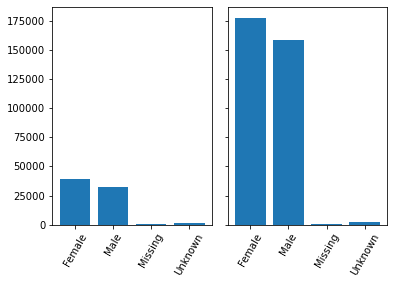

In [176]:
bar_plot(prob_case_sex['sex'], prob_case_sex['count'], conf_case_sex['sex'], conf_case_sex['count'])

In [158]:
prob_case_age =prob_case('age_group')
prob_case_age

,age_group,count
0,0 - 17 years,12677
1,18 to 49 years,41183
2,50 to 64 years,11211
3,65+ years,7192
4,Missing,1075


In [159]:
conf_case_age =conf_case('age_group')
conf_case_age

,age_group,count
0,0 - 17 years,47531
1,18 to 49 years,185349
2,50 to 64 years,61490
3,65+ years,41476
4,Missing,3752


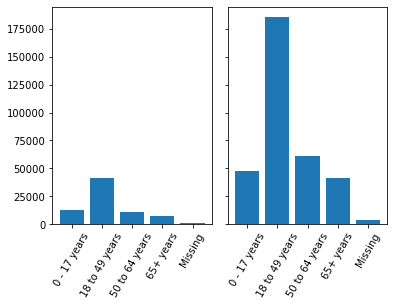

In [177]:
bar_plot(prob_case_age['age_group'], prob_case_age['count'], conf_case_age['age_group'], conf_case_age['count'])

**compare with population percentage of age groups**

In [161]:
prob_case_race = prob_case('race')
prob_case_race

,race,count
0,American Indian/Alaska Native,213
1,Asian,1061
2,Black,6796
3,Missing,5365
4,Multiple/Other,639
5,Native Hawaiian/Other Pacific Islander,31
6,Unknown,11746
7,White,47487


In [162]:
conf_case_race = conf_case('race')
conf_case_race

,race,count
0,American Indian/Alaska Native,3043
1,Asian,5747
2,Black,38417
3,Missing,29650
4,Multiple/Other,3916
5,Native Hawaiian/Other Pacific Islander,100
6,Unknown,48135
7,White,210590


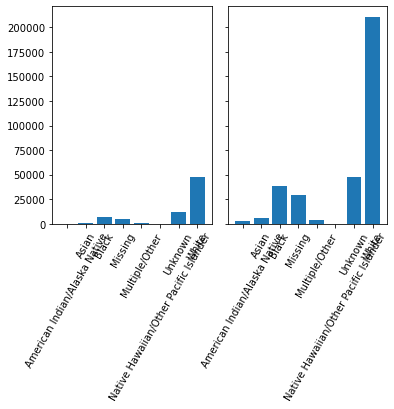

In [178]:
bar_plot(prob_case_race['race'], prob_case_race['count'], conf_case_race['race'], conf_case_race['count'])

In [164]:
prob_case_eth = prob_case('ethnicity')
prob_case_eth

,ethnicity,count
0,Hispanic/Latino,4479
1,Missing,8633
2,Non-Hispanic/Latino,46015
3,Unknown,14211


In [165]:
conf_case_eth = conf_case('ethnicity')
conf_case_eth

,ethnicity,count
0,Hispanic/Latino,27971
1,Missing,24413
2,Non-Hispanic/Latino,216503
3,Unknown,70711


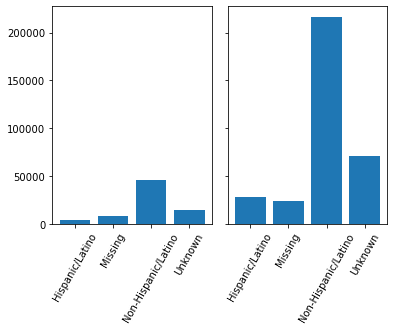

In [179]:
bar_plot(prob_case_eth['ethnicity'], prob_case_eth['count'], conf_case_eth['ethnicity'], conf_case_eth['count'])

In [167]:
prob_case_state=prob_case('res_state')
prob_case_state

,res_state,count
0,AK,51
1,AL,2035
2,AR,1336
3,AZ,1058
4,CA,2537
5,CO,724
6,CT,298
7,DE,290
8,FL,2029
9,GA,4291


In [168]:
conf_case_state=conf_case('res_state')
conf_case_state

,res_state,count
0,AK,1524
1,AL,6132
2,AR,3593
3,AZ,6406
4,CA,19154
5,CO,7116
6,CT,2949
7,DC,374
8,DE,1666
9,FL,18412


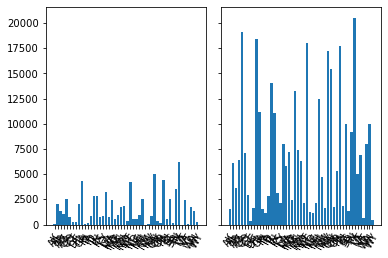

In [180]:
bar_plot(prob_case_state['res_state'], prob_case_state['count'], conf_case_state['res_state'], conf_case_state['count'])

In [268]:
#Help from https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p#:~:text=If%20your%20string%20constraint%20is%20not%20just%20one,drop%20all%20rows%20containing%20elements%20of%20your%20list

df_surv1=df_surv[~df_surv.sex.str.contains('|'.join(['Missing','Unknown']))]
df_surv1=df_surv[~df_surv.age_group.str.contains('|'.join(['Missing','Unknown']))]
df_surv1=df_surv[~df_surv.race.str.contains('|'.join(['Missing','Unknown']))]
df_surv1=df_surv[~df_surv.ethnicity.str.contains('|'.join(['Missing','Unknown']))]

In [269]:
df_surv1.shape

(294968, 11)

In [265]:
df_surv1.age_group.value_counts()

18 to 49 years    226532
50 to 64 years     72701
0 - 17 years       60208
65+ years          48668
Name: age_group, dtype: int64

In [105]:
df_surv1.head()

NameError: name 'df_surv1' is not defined

## COVID  cases and deaths by state over time

In [171]:
df_cases=pd.read_csv('../data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

In [172]:
df_cases.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/25/2020,OR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,09/17/2021,MD,"516,784",NaN,NaN,"1,525",0,"10,282","10,056",226,11,0,09/19/2021 12:00:00 AM,NaN,Agree
2,10/12/2021,VT,"33,388",NaN,NaN,112,5,333,NaN,NaN,4,0,10/14/2021 12:00:00 AM,Not agree,Not agree
3,02/01/2021,DC,"37,008",NaN,NaN,136,0,916,NaN,NaN,3,0,02/02/2021 02:51:51 PM,NaN,NaN
4,12/19/2021,NC,"1,586,243","1,339,055","247,188","3,410",466,"19,480","17,148","2,332",19,3,12/19/2021 12:00:00 AM,Agree,Agree


In [173]:
#converting case_month to DateTime
# df_cases['submission_date']=pd.to_datetime(df_cases['submission_date'])

#setting case_month as index
# df_cases.set_index('submission_date', inplace=True)

#sorting index
# df_cases.sort_index(inplace=True)

In [174]:
df_cases.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/25/2020,OR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,09/17/2021,MD,"516,784",NaN,NaN,"1,525",0,"10,282","10,056",226,11,0,09/19/2021 12:00:00 AM,NaN,Agree
2,10/12/2021,VT,"33,388",NaN,NaN,112,5,333,NaN,NaN,4,0,10/14/2021 12:00:00 AM,Not agree,Not agree
3,02/01/2021,DC,"37,008",NaN,NaN,136,0,916,NaN,NaN,3,0,02/02/2021 02:51:51 PM,NaN,NaN
4,12/19/2021,NC,"1,586,243","1,339,055","247,188","3,410",466,"19,480","17,148","2,332",19,3,12/19/2021 12:00:00 AM,Agree,Agree


In [176]:
df_cases.tail();

In [177]:
df_cases.shape

(59640, 15)

In [178]:
# This code block will print the value counts for each column in the dataframe

list_of_columns_to_survey= df_cases.columns

for col_name in list_of_columns_to_survey:
    print('------  VALUE COUNTS ------------------')
    print(f'Column name: {col_name}')
    print(df_cases[col_name].value_counts())
    print('----------------------------------------')


------  VALUE COUNTS ------------------
Column name: submission_date
01/25/2020    60
08/20/2021    60
11/22/2020    60
12/23/2021    60
06/26/2022    60
              ..
08/08/2022    60
05/26/2021    60
07/03/2022    60
06/08/2021    60
12/02/2021    60
Name: submission_date, Length: 994, dtype: int64
----------------------------------------
------  VALUE COUNTS ------------------
Column name: state
OR     994
MD     994
AK     994
IN     994
NY     994
PW     994
IA     994
TN     994
HI     994
MA     994
GU     994
MS     994
GA     994
AL     994
RMI    994
OK     994
CO     994
NYC    994
MP     994
OH     994
AS     994
PR     994
SD     994
PA     994
TX     994
ND     994
NM     994
WV     994
WA     994
AR     994
UT     994
KS     994
FSM    994
VT     994
DC     994
NC     994
MI     994
CT     994
SC     994
CA     994
ID     994
IL     994
WY     994
WI     994
NH     994
NV     994
ME     994
MO     994
AZ     994
RI     994
LA     994
VA     994
MN     994
KY     994
N

In [179]:
df_cases.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/25/2020,OR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,09/17/2021,MD,"516,784",NaN,NaN,"1,525",0,"10,282","10,056",226,11,0,09/19/2021 12:00:00 AM,NaN,Agree
2,10/12/2021,VT,"33,388",NaN,NaN,112,5,333,NaN,NaN,4,0,10/14/2021 12:00:00 AM,Not agree,Not agree
3,02/01/2021,DC,"37,008",NaN,NaN,136,0,916,NaN,NaN,3,0,02/02/2021 02:51:51 PM,NaN,NaN
4,12/19/2021,NC,"1,586,243","1,339,055","247,188","3,410",466,"19,480","17,148","2,332",19,3,12/19/2021 12:00:00 AM,Agree,Agree


In [180]:
df_cases_master=df_cases.copy()
df_cases=df_cases[['state','tot_cases','new_case','tot_death','new_death']]

In [181]:
df_cases.isnull().sum()

state        0
tot_cases    0
new_case     0
tot_death    0
new_death    0
dtype: int64

In [182]:
df_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59640 entries, 0 to 59639
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   state      59640 non-null  object
 1   tot_cases  59640 non-null  object
 2   new_case   59640 non-null  object
 3   tot_death  59640 non-null  object
 4   new_death  59640 non-null  object
dtypes: object(5)
memory usage: 2.3+ MB


In [197]:
df_cases.to_csv('../data/clean_data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time_clean.csv', index=False)

### Vaccination trends

Loading in covid vaccination trends csv as df_vacc

In [32]:
df_vacc=pd.read_csv('../data/covid_vaccination_trends.csv', low_memory=False)

In [33]:
df_vacc.shape

(74160, 25)

In [5]:
df_vacc.head()

,Date,date_type,MMWR_week,Location,Administered_Daily,Administered_Cumulative,Administered_7_Day_Rolling_Average,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Admin_Dose_1_Day_Rolling_Average,...,Series_Complete_Day_Rolling_Average,Series_Complete_Pop_Pct,Booster_Daily,Booster_Cumulative,Booster_7_Day_Rolling_Average,Additional_Doses_Vax_Pct,Second_Booster_50Plus_Daily,Second_Booster_50Plus_Cumulative,Second_Booster_50Plus_7_Day_Rolling_Average,Second_Booster_50Plus_Vax_Pct
0,10/12/2022,Report,41,DE,"17,883","2,005,782",NaN,"1,841","839,722",NaN,...,NaN,71.7,"2,245","344,388",NaN,49.3,"4,311","96,891",NaN,42.0
1,10/12/2022,Report,41,CT,"5,733","8,273,306",NaN,"5,198","3,534,406",NaN,...,NaN,81.5,"1,052","1,567,645",NaN,54.0,492,"374,525",NaN,40.4
2,10/12/2022,Report,41,CA,"3,409","81,763,386",NaN,"170,547","33,585,368",NaN,...,NaN,74.1,"-130,515","16,291,249",NaN,55.7,"-40,176","3,578,567",NaN,42.9
3,10/12/2022,Report,41,NE,"21,694","3,489,100",NaN,"1,355","1,396,070",NaN,...,NaN,65.2,"1,835","677,307",NaN,53.7,"4,749","161,952",NaN,40.2
4,10/12/2022,Report,41,PW,152,"49,838",NaN,9,"20,625",NaN,...,NaN,85.4,32,"12,133",NaN,66.0,19,"1,194",NaN,24.7


Locations encompass state/territory/federal entity. 60 unique values. 

In [13]:
df_vacc["Location"].sort_values().unique()

array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'FM', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA',
       'MA', 'MD', 'ME', 'MH', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC',
       'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
       'PR', 'PW', 'RI', 'SC', 'SD', 'TN', 'TX', 'US', 'UT', 'VA', 'VI',
       'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [88]:
len(df_vacc["Location"].sort_values().unique())

60

In [188]:
df_vacc.isnull().sum()

Date                                              0
date_type                                         0
MMWR_week                                         0
Location                                          0
Administered_Daily                                0
Administered_Cumulative                           0
Administered_7_Day_Rolling_Average             1020
Admin_Dose_1_Daily                                0
Admin_Dose_1_Cumulative                           0
Admin_Dose_1_Day_Rolling_Average               1020
Administered_Dose1_Pop_Pct                        0
Administered_daily_change_report               6660
Administered_daily_change_report_7dayroll      7740
Series_Complete_Daily                             0
Series_Complete_Cumulative                        0
Series_Complete_Day_Rolling_Average            1020
Series_Complete_Pop_Pct                           0
Booster_Daily                                     0
Booster_Cumulative                                0
Booster_7_Da

In [34]:
df_vacc.dropna(inplace=True)

Dropping "date_type" and "MMWR_week" columns

In [35]:
df_vacc.drop(columns = "date_type", inplace = True)

In [41]:
df_vacc.drop(columns = "MMWR_week", inplace = True)

Deleting the commas in the columns.

In [37]:
# I used the following stackoverflow post to delete the commas in all the columns:
# https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once

df_vacc.replace(",", "", regex = True, inplace = True)

Using for loop to change columns from object to float64 dtype:

In [48]:
# I used the following stackoverflow article to convert multiple columns from object into float64:
# https://stackoverflow.com/questions/55833729/how-to-change-datatype-of-multiple-columns-in-pandas

for column in df_vacc.columns[2:]:
    if df_vacc[column].dtype == "object":
        df_vacc[column] = df_vacc[column].astype(np.float64)

I noticed there are negative values in columns that don't have the word "change" in the column name. This doesn't makes sense. I suspect these are typos, so I changed them to positive values by using this for loop:

In [ ]:
for column in df_vacc.columns[2:]:
    if "change" in df_vacc[column]:
        pass
    else:
        df_vacc[column] = df_vacc[column].abs()

In [4]:
df_vacc.describe()

,Administered_Daily,Administered_Cumulative,Administered_7_Day_Rolling_Average,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Admin_Dose_1_Day_Rolling_Average,Administered_Dose1_Pop_Pct,Administered_daily_change_report,Administered_daily_change_report_7dayroll,Series_Complete_Daily,...,Series_Complete_Day_Rolling_Average,Series_Complete_Pop_Pct,Booster_Daily,Booster_Cumulative,Booster_7_Day_Rolling_Average,Additional_Doses_Vax_Pct,Second_Booster_50Plus_Daily,Second_Booster_50Plus_Cumulative,Second_Booster_50Plus_7_Day_Rolling_Average,Second_Booster_50Plus_Vax_Pct
count,6.642000e+04,6.642000e+04,6.642000e+04,6.642000e+04,6.642000e+04,6.642000e+04,66420.000000,6.642000e+04,6.642000e+04,6.642000e+04,...,6.642000e+04,66420.000000,6.642000e+04,6.642000e+04,6.642000e+04,66420.000000,6.642000e+04,6.642000e+04,6.642000e+04,66420.000000
mean,3.595863e+04,1.207441e+07,3.577067e+04,1.599666e+04,6.027294e+06,1.582649e+04,53.794680,1.789310e+04,3.577067e+04,1.344609e+04,...,1.339701e+04,44.673245,6.337320e+03,1.179121e+06,6.320002e+03,16.251596,9.957735e+02,4.128483e+04,9.784429e+02,1.862185
std,1.805238e+05,5.257534e+07,1.715154e+05,1.515108e+05,2.560373e+07,9.827854e+04,25.899333,1.305834e+05,1.715154e+05,1.385771e+05,...,8.878831e+04,24.339396,5.173903e+04,7.319775e+06,4.637529e+04,20.465388,4.777585e+04,5.180223e+05,2.020102e+04,5.726777
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.179000e+03,7.279488e+05,2.053000e+03,2.550000e+02,3.976322e+05,4.160000e+02,39.100000,0.000000e+00,2.053000e+03,1.460000e+02,...,2.670000e+02,29.100000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.395000e+03,2.880755e+06,7.801000e+03,1.699500e+03,1.548714e+06,2.254500e+03,59.850000,0.000000e+00,7.801000e+03,1.199000e+03,...,1.585000e+03,51.600000,0.000000e+00,5.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,2.021550e+04,7.951898e+06,2.058100e+04,7.121250e+03,4.023175e+06,7.594250e+03,71.800000,6.823000e+03,2.058100e+04,5.564000e+03,...,5.916000e+03,62.000000,1.298250e+03,5.802575e+05,1.682000e+03,37.800000,3.000000e+00,1.450000e+02,5.000000e+00,0.300000
max,4.787054e+06,5.961645e+08,3.502988e+06,3.015052e+07,2.598709e+08,5.011136e+06,100.000000,4.567102e+06,3.502988e+06,2.870943e+07,...,4.837589e+06,88.800000,2.748886e+06,1.057888e+08,1.257266e+06,64.500000,1.183530e+07,1.706439e+07,1.855467e+06,37.600000


The dataset covers time period 12/2020 to 06/2022, with 556 unique dates:

In [80]:
len(df_vacc["Date"].sort_values().unique())

556

In [78]:
df_vacc.tail()

,Date,Location,Administered_Daily,Administered_Cumulative,Administered_7_Day_Rolling_Average,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Admin_Dose_1_Day_Rolling_Average,Administered_Dose1_Pop_Pct,Administered_daily_change_report,...,Series_Complete_Day_Rolling_Average,Series_Complete_Pop_Pct,Booster_Daily,Booster_Cumulative,Booster_7_Day_Rolling_Average,Additional_Doses_Vax_Pct,Second_Booster_50Plus_Daily,Second_Booster_50Plus_Cumulative,Second_Booster_50Plus_7_Day_Rolling_Average,Second_Booster_50Plus_Vax_Pct
74155,12/13/2020,DE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74156,12/13/2020,FL,820.0,820.0,820.0,836.0,836.0,836.0,0.0,820.0,...,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74157,12/13/2020,MS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74158,12/13/2020,OK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74159,12/13/2020,GU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
df_vacc.head()

,Date,Location,Administered_Daily,Administered_Cumulative,Administered_7_Day_Rolling_Average,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Admin_Dose_1_Day_Rolling_Average,Administered_Dose1_Pop_Pct,Administered_daily_change_report,...,Series_Complete_Day_Rolling_Average,Series_Complete_Pop_Pct,Booster_Daily,Booster_Cumulative,Booster_7_Day_Rolling_Average,Additional_Doses_Vax_Pct,Second_Booster_50Plus_Daily,Second_Booster_50Plus_Cumulative,Second_Booster_50Plus_7_Day_Rolling_Average,Second_Booster_50Plus_Vax_Pct
7740,06/21/2022,ND,509.0,1131991.0,438.0,91.0,504634.0,74.0,66.2,509.0,...,52.0,56.3,120.0,189296.0,96.0,44.1,193.0,18578.0,177.0,15.2
7741,06/21/2022,CA,40018.0,77624034.0,35217.0,6980.0,32940724.0,4604.0,83.4,40018.0,...,3597.0,72.9,11490.0,15518543.0,11000.0,53.9,15935.0,2512239.0,14385.0,31.1
7742,06/21/2022,IA,2539.0,5276550.0,2036.0,365.0,2159525.0,214.0,68.4,2539.0,...,186.0,62.6,484.0,1065873.0,418.0,54.0,1408.0,202036.0,1168.0,28.8
7743,06/21/2022,AR,2027.0,4363089.0,1616.0,356.0,2036932.0,295.0,67.5,2027.0,...,221.0,55.2,462.0,683622.0,382.0,41.1,876.0,108487.0,677.0,23.3
7744,06/21/2022,MI,6310.0,16386296.0,5279.0,895.0,6743028.0,652.0,67.5,6310.0,...,554.0,60.8,1543.0,3360001.0,1328.0,55.4,3132.0,597299.0,2627.0,27.7


Converting df_vacc["Date"] into a pandas datetime

In [12]:
df_vacc["Date"] = pd.to_datetime(df_vacc["Date"])

Setting df_vacc["Date"] as the index, and sorting the index:

In [13]:
df_vacc.set_index("Date", inplace = True)

In [14]:
df_vacc.sort_index(inplace = True)

Filter to include information from only the states/territories, not entire US:

In [28]:
df_vacc_states = df_vacc[df_vacc["Location"] != "US"].copy()

## The total number of doses administered daily in the US:

In [47]:
df_vacc_states.groupby("Date")["Administered_Daily"].sum()

Date
2020-12-13     38908.0
2020-12-14      5195.0
2020-12-15     58605.0
2020-12-16    194437.0
2020-12-17    340526.0
                ...   
2022-06-17    296294.0
2022-06-18    130370.0
2022-06-19     61971.0
2022-06-20    233034.0
2022-06-21    267202.0
Name: Administered_Daily, Length: 556, dtype: float64

Converting groupby results into a dataframe to properly plot results:

In [48]:
a = df_vacc_states.groupby("Date")["Administered_Daily"].sum()
daily_total_doses = a.to_frame()

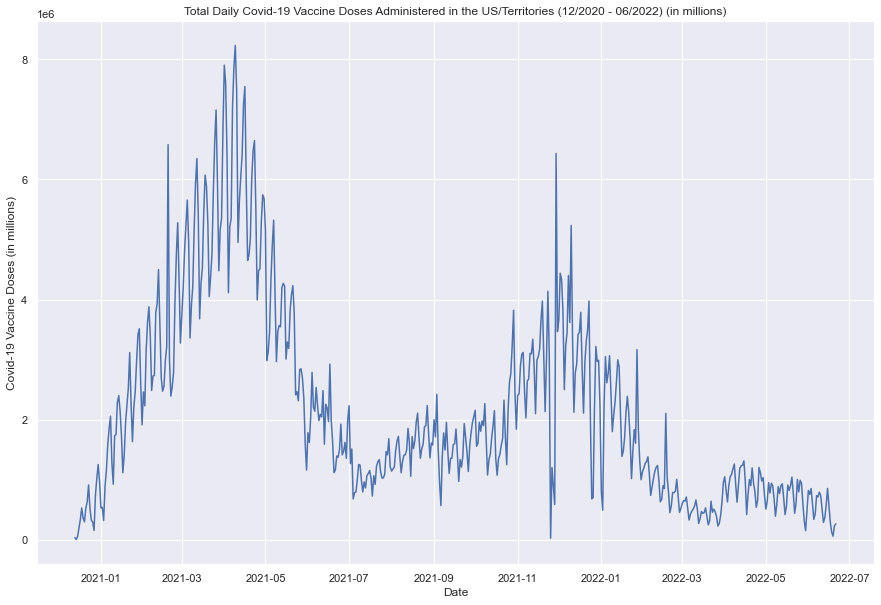

In [94]:
plt.figure(figsize = (15,10))
plt.plot(daily_total_doses.index, daily_total_doses["Administered_Daily"])
plt.xlabel("Date")
plt.ylabel("Covid-19 Vaccine Doses (in millions)")
plt.title("Total Daily Covid-19 Vaccine Doses Administered in the US/Territories (12/2020 - 06/2022) (in millions)");


'''
taken from https://towardsdatascience.com/8-visualizations-with-python-to-handle-multiple-time-series-data-19b5b2e66dd0
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_vacc_states, x = df_vacc_states.index, y = 'Administered_Daily',
                  hue='Location', palette='viridis',
                  legend='full', lw=3)
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Covid-19 Vaccine Doses (in millions)')
plt.xlabel('Date')
plt.show()
'''

Filtering the data into include only the states in the Northeast. 

In [80]:
# I used the following stackoverflow post to filter by multiple states:
# https://stackoverflow.com/questions/35164019/filter-multiple-values-using-pandas

ne_states = ["CT", "RI", "MA", "VT", "NH", "ME", "NY", "PA", "NJ"]

df_vacc_ne = df_vacc_states[df_vacc_states["Location"].isin(ne_states)]

Plot of Total Daily Covid-19 Vaccine Doses Administered in the Northeast (12/2020 - 06/2022) (in millions)"

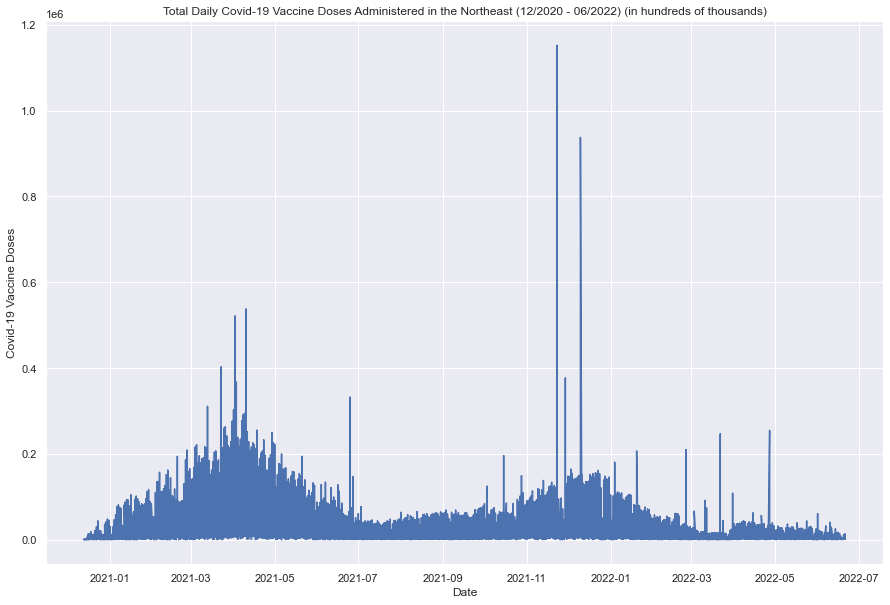

In [108]:
plt.figure(figsize = (15,10))
plt.plot(df_vacc_ne.index, df_vacc_ne["Administered_Daily"])
plt.xlabel("Date")
plt.ylabel("Covid-19 Vaccine Doses")
plt.title("Total Daily Covid-19 Vaccine Doses Administered in the Northeast (12/2020 - 06/2022) (in hundreds of thousands)");

In the Northeast:
- Average percent of pop. with completed series: 53.4%
- Average percent of pop. who have completed primary series and received a booster: 17.7%

In [107]:
df_vacc_ne.describe().T

,count,mean,std,min,25%,50%,75%,max
Administered_Daily,9963.0,2.341037e+04,3.955513e+04,0.0,2371.0,8573.0,26873.0,1151719.0
Administered_Cumulative,9963.0,7.709891e+06,9.357046e+06,0.0,1341373.5,2644389.0,12433282.0,40390028.0
Administered_7_Day_Rolling_Average,9963.0,2.321208e+04,3.372458e+04,0.0,3187.5,9715.0,28847.5,266430.0
Admin_Dose_1_Daily,9963.0,1.075744e+04,3.394422e+04,0.0,612.5,2716.0,10432.0,1859578.0
Admin_Dose_1_Cumulative,9963.0,3.912403e+06,4.527405e+06,0.0,659582.0,1228349.0,6565184.5,17726219.0
Admin_Dose_1_Day_Rolling_Average,9963.0,1.063610e+04,2.044431e+04,0.0,862.0,3090.0,11060.0,304266.0
Administered_Dose1_Pop_Pct,9963.0,6.448740e+01,2.935964e+01,0.0,53.5,73.9,88.2,95.0
Administered_daily_change_report,9963.0,1.150459e+04,2.748765e+04,0.0,0.0,64.0,8744.5,302336.0
Administered_daily_change_report_7dayroll,9963.0,2.321208e+04,3.372458e+04,0.0,3187.5,9715.0,28847.5,266430.0
Series_Complete_Daily,9963.0,8.710878e+03,2.837269e+04,0.0,335.0,1810.0,7245.5,1604619.0


In [42]:
# need to break it down by states by filtering

In [ ]:
# Plot of Administered_Daily doses by state/territory

In [ ]:
# Plot of Administed_daily_change_report doses by state/territory

Loading the covid_vaccination_trends_clean.csv as df_vacc

In [11]:
df_vacc = pd.read_csv("../data/clean_data/covid_vaccination_trends_clean.csv")

Saving df_vacc as covid_vaccination_trends_clean.csv

In [109]:
df_vacc.to_csv('../data/clean_data/covid_vaccination_trends_clean.csv', index=False)

In [ ]:
#test